In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

### 数据预处理

In [5]:
def fill_missing_value(data):
    filled_data = data.copy()
    cols = list(filled_data.columns)
    for col in cols:
        filled_data[col] = filled_data[col].fillna(0)
    return filled_data

def filter_invalid_data(data):
    filtered_data = data.copy()
    cols = list(filtered_data.columns)
    filtered_data['Total'] = filtered_data[cols[1:15]].sum(axis=1)
    filtered_data = filtered_data[(filtered_data['Total'] >= 85) & (filtered_data['Total'] <= 105)]
    return filtered_data
    
def rename_data(data):
    renamed_data = data.copy()
    renamed_data['表面风化'][renamed_data['表面风化'] == '无风化'] = 0
    renamed_data['表面风化'][renamed_data['表面风化'] == '风化'] = 1
    renamed_data = renamed_data.rename(columns={'表面风化':'weathering', 
                              '二氧化硅(SiO2)':'SiO2', 
                              '氧化钠(Na2O)':'Na2O',
                              '氧化钾(K2O)':'K2O',
                              '氧化钙(CaO)':'CaO',
                              '氧化镁(MgO)':'MgO',
                              '氧化铝(Al2O3)':'Al2O3',
                              '氧化铁(Fe2O3)':'Fe2O3',
                              '氧化铜(CuO)':'CuO',
                              '氧化铅(PbO)':'PbO',
                              '氧化钡(BaO)':'BaO',
                              '五氧化二磷(P2O5)':'P2O5',
                              '氧化锶(SrO)':'SrO',
                              '氧化锡(SnO2)':'SnO2',
                              '二氧化硫(SO2)':'SO2'})
    return renamed_data

def process_data_gm(data, pipeline_functions):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    return data

def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

In [6]:
def process_data_fm(data):
    X = data
    X = process_data_gm(X, [
                            (fill_missing_value, None, None),
                            (filter_invalid_data, None, None),
                            (rename_data, None, None),
                            (select_columns, [# Binary Features
                                              'weathering',
                                              # Numerical Features
                                              'SiO2',
                                              'Na2O',
                                              'K2O',
                                              'CaO',
                                              'MgO',
                                              'Al2O3',
                                              'Fe2O3',
                                              'CuO',
                                              'PbO',
                                              'BaO',
                                              'P2O5',
                                              'SrO',
                                              'SnO2',
                                              'SO2'], None)])
    return X

In [10]:
df4_pca = pd.read_excel('附件.xlsx',sheet_name='表单4')
df4_pca = df4_pca.drop(['文物编号','纹饰','颜色','文物采样点'],axis=1)
df4_pca_K = df4_pca[df4_pca['类型'] == '高钾']
df4_pca_PbBa = df4_pca[df4_pca['类型'] == '铅钡']

### K

In [45]:
a_K = process_data_fm(df4_pca_K.copy())
a_K = a_K[list(a_K.columns)[:15]]
a_K

,weathering,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
0,0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
1,0,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
2,0,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
3,0,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
4,0,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
5,0,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
6,0,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
7,0,59.01,2.86,12.53,8.70,0.00,6.16,2.88,4.73,0.00,0.00,1.27,0.00,0.00,0.00
8,0,62.47,3.38,12.28,8.23,0.66,9.23,0.50,0.47,1.62,0.00,0.16,0.00,0.00,0.00
9,0,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,0.00,0.04,0.00,0.00


#### 风化前后统计值

In [43]:
a_K[a_K['weathering'] == 0].describe()

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,67.984167,0.695000,9.330833,5.332500,1.079167,6.620000,1.931667,2.45250,0.411667,0.598333,1.402500,0.041667,0.196667,0.101667
std,8.755099,1.286917,3.920303,3.092478,0.676145,2.491509,1.666694,1.65999,0.588987,0.982102,1.433959,0.048399,0.681273,0.185513
min,59.010000,0.000000,0.000000,0.000000,0.000000,3.050000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.677500,0.000000,7.602500,4.035000,0.625000,5.140000,0.480000,0.99750,0.000000,0.000000,0.690000,0.000000,0.000000,0.000000
50%,65.530000,0.000000,9.830000,6.095000,1.165000,6.185000,2.110000,2.34500,0.155000,0.000000,1.020000,0.020000,0.000000,0.000000
75%,71.167500,0.525000,12.302500,7.570000,1.602500,7.932500,2.447500,3.42750,0.512500,1.072500,1.292500,0.077500,0.000000,0.090000
max,87.050000,3.380000,14.520000,8.700000,1.980000,11.150000,6.040000,5.09000,1.620000,2.860000,4.500000,0.120000,2.360000,0.470000


In [44]:
a_K[a_K['weathering'] == 1].describe()

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
count,6.000000,6.0,6.000000,6.00000,6.000000,6.00000,6.000000,6.000000,6.0,6.0,6.000000,6.0,6.0,6.0
mean,93.963333,0.0,0.543333,0.87000,0.196667,1.93000,0.265000,1.561667,0.0,0.0,0.280000,0.0,0.0,0.0
std,1.733617,0.0,0.445182,0.48777,0.306311,0.96449,0.069498,0.934824,0.0,0.0,0.209952,0.0,0.0,0.0
min,92.350000,0.0,0.000000,0.21000,0.000000,0.81000,0.170000,0.550000,0.0,0.0,0.000000,0.0,0.0,0.0
25%,92.652500,0.0,0.147500,0.64500,0.000000,1.35500,0.215000,1.015000,0.0,0.0,0.165000,0.0,0.0,0.0
50%,93.505000,0.0,0.665000,0.83000,0.000000,1.72000,0.275000,1.545000,0.0,0.0,0.280000,0.0,0.0,0.0
75%,94.837500,0.0,0.875000,1.03750,0.405000,2.37750,0.312500,1.625000,0.0,0.0,0.357500,0.0,0.0,0.0
max,96.770000,0.0,1.010000,1.66000,0.640000,3.50000,0.350000,3.240000,0.0,0.0,0.610000,0.0,0.0,0.0


#### 单个风化前后

AxesSubplot(0.125,0.834518;0.775x0.0454819)
AxesSubplot(0.125,0.77994;0.775x0.0454819)
AxesSubplot(0.125,0.725361;0.775x0.0454819)
AxesSubplot(0.125,0.670783;0.775x0.0454819)
AxesSubplot(0.125,0.616205;0.775x0.0454819)
AxesSubplot(0.125,0.561627;0.775x0.0454819)
AxesSubplot(0.125,0.507048;0.775x0.0454819)
AxesSubplot(0.125,0.45247;0.775x0.0454819)
AxesSubplot(0.125,0.397892;0.775x0.0454819)
AxesSubplot(0.125,0.343313;0.775x0.0454819)
AxesSubplot(0.125,0.288735;0.775x0.0454819)
AxesSubplot(0.125,0.234157;0.775x0.0454819)
AxesSubplot(0.125,0.179578;0.775x0.0454819)
AxesSubplot(0.125,0.125;0.775x0.0454819)


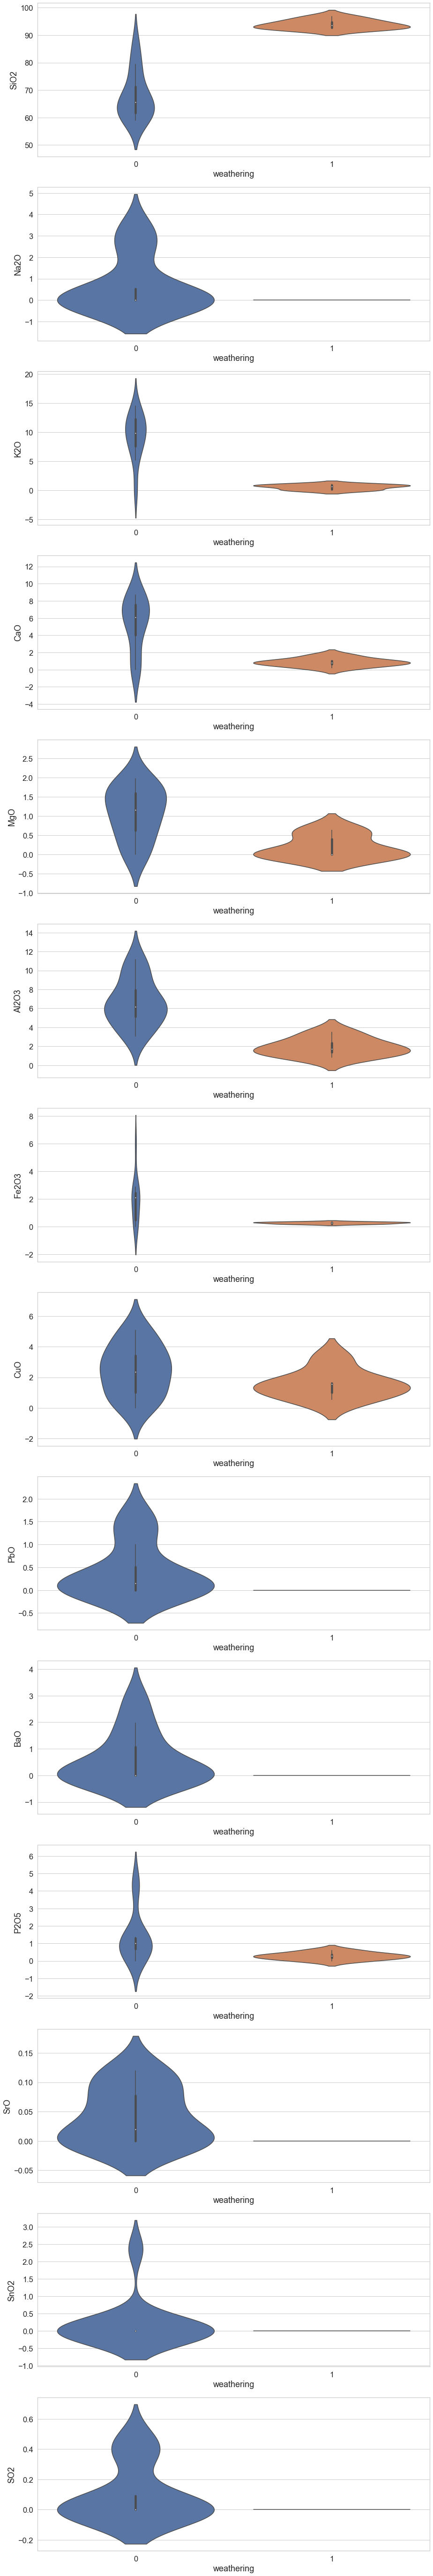

In [27]:
fig = plt.figure(figsize=(15,100))
cols = list(a_K.columns)[1:]
for i in range(14):
    ax = fig.add_subplot(14, 1, i + 1)
    print(sns.violinplot(data = a_K, x = 'weathering', y = cols[i]))

#### 整体风化前后

In [34]:
def combinate(a):
    com = a.copy()
    com['SiO2'] = com['SiO2']+com['P2O5']+com['Al2O3']+com['Fe2O3']+com['PbO']
    com['R2O'] = com['Na2O']+com['K2O']
    com['RO'] = com['CaO']+com['MgO']+com['CuO']+com['BaO']+com['SrO']
    com = com.drop(columns={'Na2O','K2O','CaO','MgO','Al2O3','Fe2O3','CuO','PbO','BaO','P2O5','SrO','SnO2','SO2'})
    com['R2O+RO'] = com['R2O']+com['RO']
    com['R2O/RO'] = com['R2O']/com['RO']
    com['SiO2/(R2O+RO)'] = com['SiO2']/(com['R2O']+com['RO'])
    return com

com_K = combinate(a_K.copy())

In [35]:
com_K

,weathering,SiO2,R2O,RO,R2O+RO,R2O/RO,SiO2/(R2O+RO)
0,0,76.17,9.99,11.06,21.05,0.903255,3.618527
1,0,92.02,5.19,2.79,7.98,1.860215,11.531328
2,0,71.48,12.37,15.03,27.40,0.823021,2.608759
3,0,75.17,9.67,10.86,20.53,0.890424,3.661471
4,0,72.64,10.95,12.45,23.40,0.879518,3.104274
5,0,85.57,7.37,5.98,13.35,1.232441,6.409738
6,0,80.75,7.68,10.41,18.09,0.737752,4.463792
7,0,69.32,15.39,13.43,28.82,1.145942,2.405274
8,0,73.98,15.66,9.36,25.02,1.673077,2.956835
9,0,71.89,16.62,9.90,26.52,1.678788,2.710784


AxesSubplot(0.125,0.772143;0.775x0.107857)
AxesSubplot(0.125,0.642714;0.775x0.107857)
AxesSubplot(0.125,0.513286;0.775x0.107857)
AxesSubplot(0.125,0.383857;0.775x0.107857)
AxesSubplot(0.125,0.254429;0.775x0.107857)
AxesSubplot(0.125,0.125;0.775x0.107857)


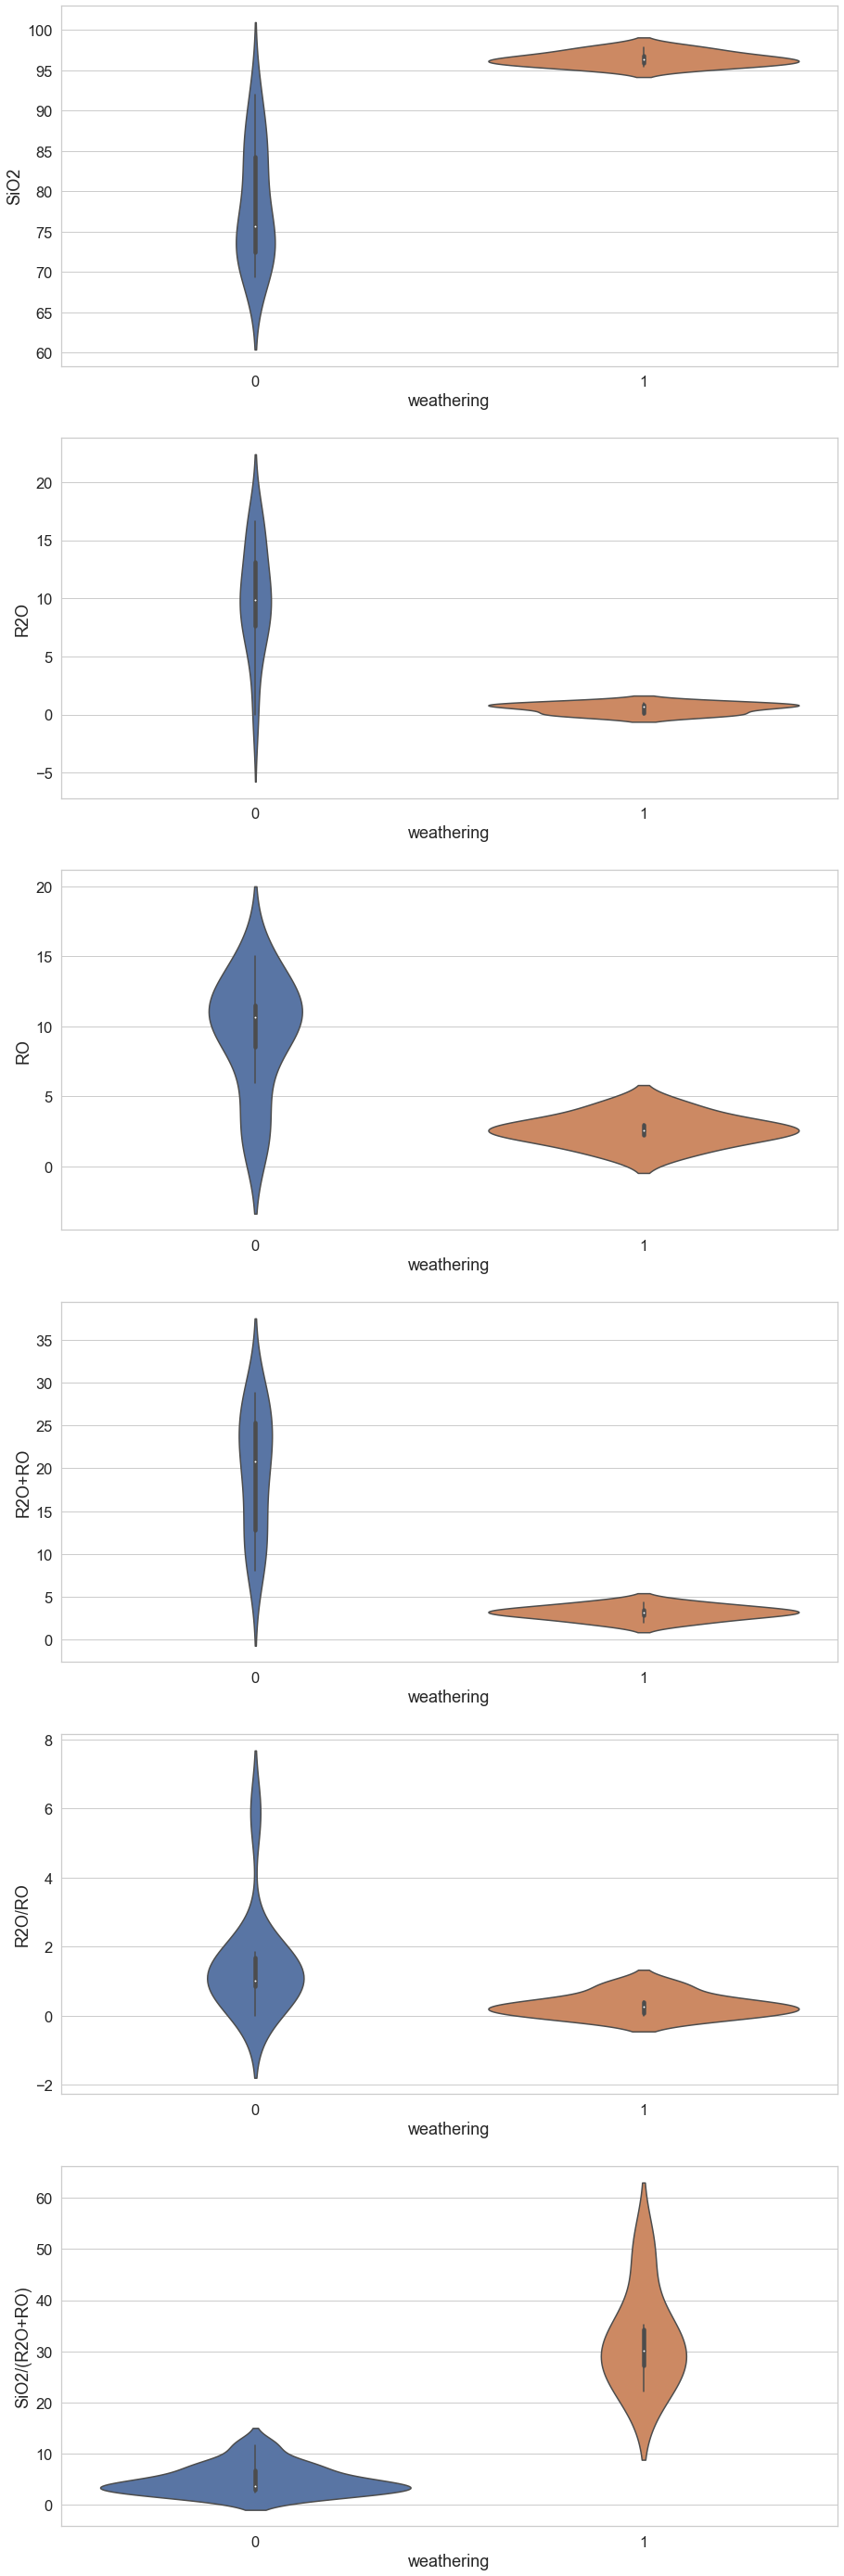

In [31]:
fig = plt.figure(figsize=(15,50))
cols = list(com_K.columns)[1:]
for i in range(6):
    ax = fig.add_subplot(6, 1, i + 1)
    print(sns.violinplot(data = com_K, x = 'weathering', y = cols[i]))

### PbBa

In [15]:
a_PbBa = process_data_fm(df4_pca_PbBa.copy())
a_PbBa = a_PbBa[list(a_PbBa.columns)[:15]]
a_PbBa

,weathering,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
18,0,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
19,0,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
20,0,34.34,0.00,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.00
21,0,36.93,0.00,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.00
22,0,65.91,0.00,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.00
23,0,69.71,0.00,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17,0.00,0.00,0.00
24,0,75.51,0.00,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13,0.00,0.00,0.00
25,0,65.91,0.00,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42,0.00,0.00,0.00
26,0,60.12,0.00,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46,0.31,0.00,3.66
27,0,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00,0.23,0.00,0.00


#### 风化前后统计值

In [51]:
a_PbBa_0 = a_PbBa[a_PbBa['weathering'] == 0]
a_PbBa_0.describe()

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,53.443846,0.771538,0.258462,1.231538,0.492308,3.194615,0.933077,1.556923,23.593846,10.499231,0.903846,0.296923,0.064615,0.281538
std,14.587271,1.538310,0.398117,1.457703,0.545469,1.385241,1.445132,2.490918,9.094393,6.949784,1.570581,0.313751,0.157935,1.015101
min,31.940000,0.000000,0.000000,0.000000,0.000000,1.440000,0.000000,0.000000,9.300000,3.420000,0.000000,0.000000,0.000000,0.000000
25%,37.360000,0.000000,0.000000,0.460000,0.000000,2.350000,0.000000,0.160000,16.550000,5.680000,0.130000,0.000000,0.000000,0.000000
50%,55.210000,0.000000,0.150000,0.840000,0.510000,3.060000,0.000000,0.530000,22.050000,10.060000,0.200000,0.300000,0.000000,0.000000
75%,65.910000,0.000000,0.250000,1.130000,0.890000,4.350000,1.510000,0.860000,29.140000,10.350000,1.410000,0.430000,0.000000,0.000000
max,75.510000,4.660000,1.410000,4.490000,1.670000,5.450000,4.590000,8.460000,39.220000,26.230000,5.750000,0.910000,0.440000,3.660000


In [52]:
a_PbBa_1 = a_PbBa[a_PbBa['weathering'] == 1]
a_PbBa_1.describe()

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,34.443429,0.979714,0.146857,2.321429,0.720857,3.916286,0.571714,1.963429,36.998286,9.912000,4.058000,0.361714,0.057429,0.585429
std,16.728782,1.940974,0.216425,1.628495,0.654466,3.429775,0.695378,2.516428,15.365865,8.287571,4.169376,0.247214,0.234801,2.727340
min,3.720000,0.000000,0.000000,0.000000,0.000000,0.450000,0.000000,0.000000,12.310000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.525000,0.000000,0.000000,0.950000,0.000000,1.735000,0.000000,0.690000,24.205000,5.725000,0.265000,0.220000,0.000000,0.000000
50%,29.640000,0.000000,0.000000,2.140000,0.710000,3.330000,0.320000,0.880000,40.240000,7.660000,3.130000,0.330000,0.000000,0.000000
75%,50.935000,1.070000,0.280000,3.190000,1.170000,4.975000,0.945000,2.695000,46.985000,10.855000,6.900000,0.465000,0.000000,0.000000
max,68.080000,7.920000,1.050000,6.400000,2.730000,14.340000,2.740000,10.570000,70.210000,35.450000,14.130000,1.120000,1.310000,15.950000


#### 单个风化前后

AxesSubplot(0.125,0.834518;0.775x0.0454819)
AxesSubplot(0.125,0.77994;0.775x0.0454819)
AxesSubplot(0.125,0.725361;0.775x0.0454819)
AxesSubplot(0.125,0.670783;0.775x0.0454819)
AxesSubplot(0.125,0.616205;0.775x0.0454819)
AxesSubplot(0.125,0.561627;0.775x0.0454819)
AxesSubplot(0.125,0.507048;0.775x0.0454819)
AxesSubplot(0.125,0.45247;0.775x0.0454819)
AxesSubplot(0.125,0.397892;0.775x0.0454819)
AxesSubplot(0.125,0.343313;0.775x0.0454819)
AxesSubplot(0.125,0.288735;0.775x0.0454819)
AxesSubplot(0.125,0.234157;0.775x0.0454819)
AxesSubplot(0.125,0.179578;0.775x0.0454819)
AxesSubplot(0.125,0.125;0.775x0.0454819)


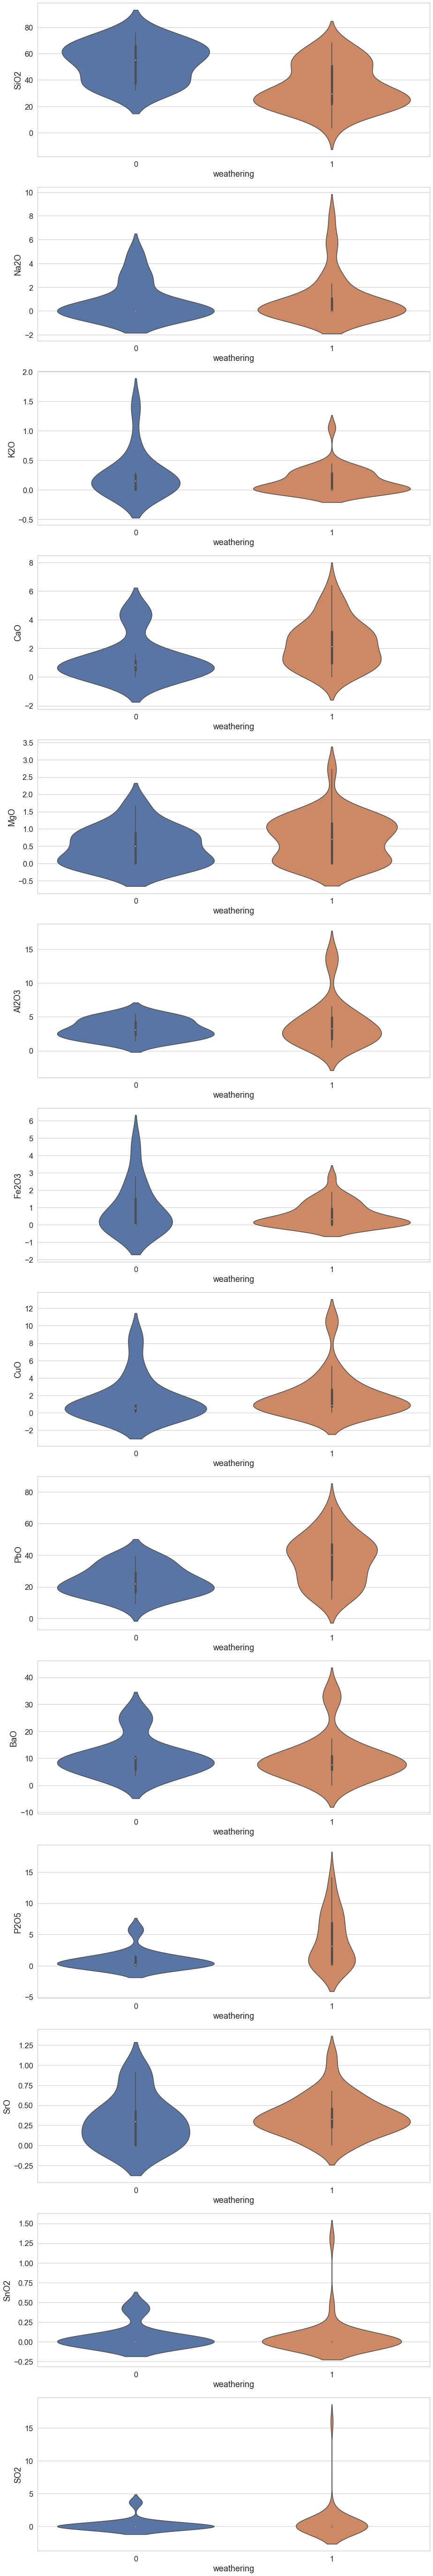

In [26]:
fig = plt.figure(figsize=(15,100))
cols = list(a_PbBa.columns)[1:]
for i in range(14):
    ax = fig.add_subplot(14, 1, i + 1)
    print(sns.violinplot(data = a_PbBa, x = 'weathering', y = cols[i]))

#### 整体风化前后

In [36]:
com_PbBa = combinate(a_PbBa.copy())

In [37]:
com_PbBa

,weathering,SiO2,R2O,RO,R2O+RO,R2O/RO,SiO2/(R2O+RO)
18,0,59.37,0.71,28.33,29.04,0.025062,2.044421
19,0,62.81,0.00,36.07,36.07,0.000000,1.741336
20,0,80.03,1.41,16.11,17.52,0.087523,4.567922
21,0,82.68,0.00,15.58,15.58,0.000000,5.306804
22,0,91.78,0.00,6.65,6.65,0.000000,13.801504
23,0,93.00,0.21,5.45,5.66,0.038532,16.431095
24,0,94.15,0.15,5.66,5.81,0.026502,16.204819
25,0,89.99,0.00,6.22,6.22,0.000000,14.467846
26,0,81.54,0.23,14.55,14.78,0.015808,5.516915
27,0,82.27,2.77,13.30,16.07,0.208271,5.119477


AxesSubplot(0.125,0.772143;0.775x0.107857)
AxesSubplot(0.125,0.642714;0.775x0.107857)
AxesSubplot(0.125,0.513286;0.775x0.107857)
AxesSubplot(0.125,0.383857;0.775x0.107857)
AxesSubplot(0.125,0.254429;0.775x0.107857)
AxesSubplot(0.125,0.125;0.775x0.107857)


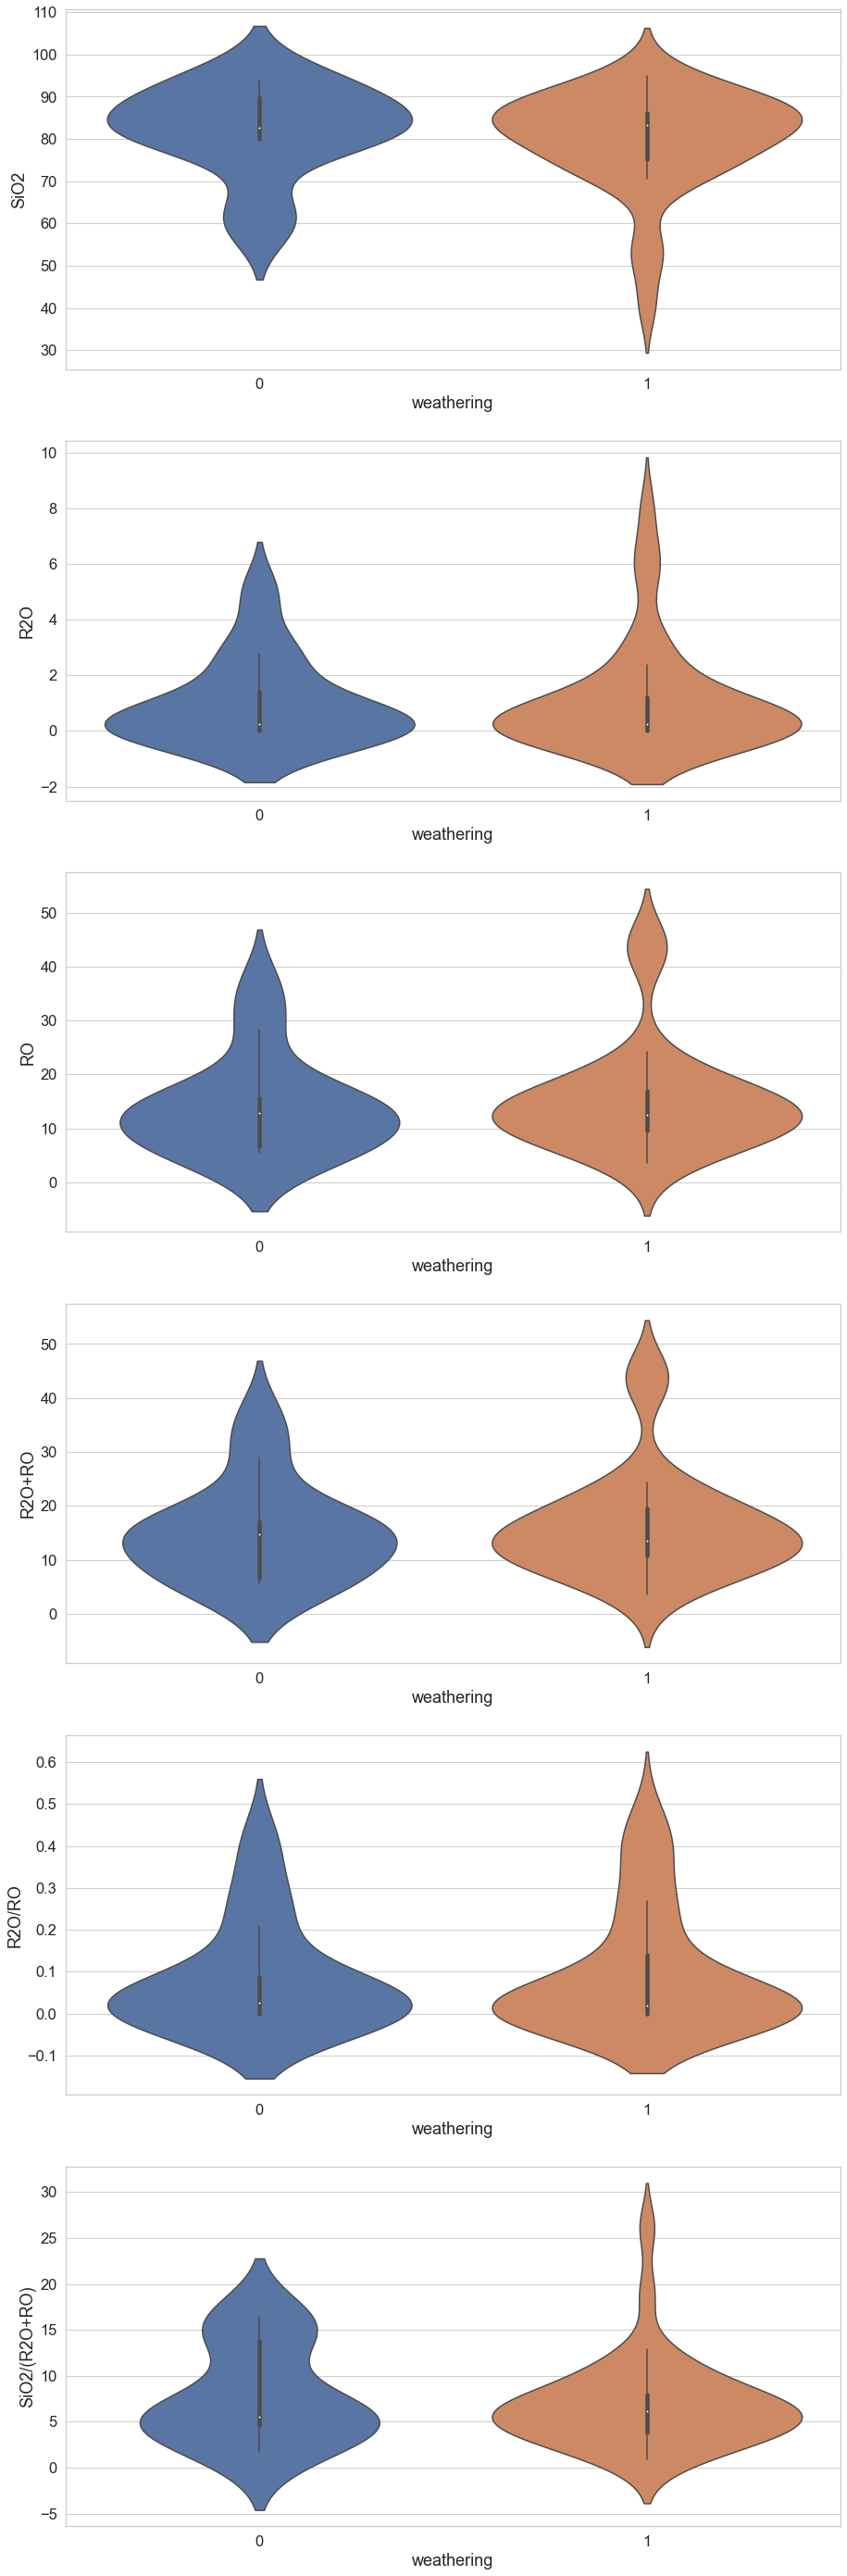

In [39]:
fig = plt.figure(figsize=(15,50))
cols = list(com_PbBa.columns)[1:]
for i in range(6):
    ax = fig.add_subplot(6, 1, i + 1)
    print(sns.violinplot(data = com_PbBa, x = 'weathering', y = cols[i]))

#### 多元线性回归求SiO2

In [74]:
X_col = [
 'CaO',
 'Al2O3',
 'Fe2O3',
 'CuO',
 'BaO']

In [75]:
a_PbBa_0[X_col].copy()

,CaO,Al2O3,Fe2O3,CuO,BaO
18,0.00,5.45,1.51,4.78,23.55
19,0.47,1.59,0.00,8.46,26.23
20,4.49,4.35,2.12,0.00,10.29
21,4.24,3.86,2.74,0.00,10.35
22,1.60,3.11,4.59,0.44,3.42
23,0.46,2.36,1.00,0.11,4.88
24,0.64,2.35,0.00,0.47,3.55
25,0.38,1.44,0.17,0.16,5.68
26,0.89,2.72,0.00,3.01,10.34
27,0.84,5.00,0.00,0.53,10.96


In [76]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
reg = linear_model.LinearRegression()

X = StandardScaler().fit_transform(a_PbBa_0[X_col].copy())
y = StandardScaler().fit_transform(a_PbBa_0[['SiO2']].copy())
reg.fit(X,y)

reg.coef_

array([[-0.43910625,  0.27486339, -0.05833363,  0.73752014, -1.55172524]])

In [77]:
y_pred = reg.predict(a_PbBa_1[X_col])
y_pred = y_pred.flatten()
y_pred

array([ 6.30713289e-01, -4.10643547e+01, -1.98366118e+01, -6.09593704e+00,
       -1.60275232e+01, -9.33776387e+00, -4.26874596e+01, -5.33509581e+01,
       -5.34604953e+00, -1.84831730e-02, -1.43282379e+01, -1.60450253e+01,
       -1.42621104e+01, -1.09044147e+01, -1.10895654e+01, -1.63717986e+01,
       -1.36540106e+01, -1.33209890e+01, -9.09315188e+00, -5.89904844e+00,
       -5.27945992e+00, -8.88958946e+00, -9.64143556e+00, -5.37065734e+00,
       -2.21071051e+01, -9.36204666e+00, -1.30604056e+01, -1.03406797e+00,
       -1.35819883e+01, -1.22285797e+01, -1.05720698e+01,  1.99152837e+00,
       -2.34143353e+01, -2.59653502e+01, -1.01929059e+01])

In [78]:
difference = pd.DataFrame({'original': a_PbBa_1['SiO2'], 'predict': y_pred})
difference

,original,predict
31,36.28,0.630713
32,20.14,-41.064355
33,33.59,-19.836612
34,29.64,-6.095937
35,53.79,-16.027523
36,50.61,-9.337764
37,19.79,-42.687460
38,3.72,-53.350958
39,68.08,-5.346050
40,63.30,-0.018483
